# Statistinis modeliavimas: užduotis 1-5
## Vilniaus Universitetas
### Firstname Lastname

1. Sugeneruokite pseudoatsitiktinių skaičių sekas tiesiniu kongruentiniu metodu su maksimaliu periodu, kai modulis $m=776$ ir $m=1107$. Daugiklius $a$ parinkite taip, kad galingumai būtų didžiausi. Prieauglio $c$ parinkimui naudokitės gretimų narių koreliacija (teoriniai testai).

Tiesinio kongruentinio metodo formulė:
$X_{n+1} \equiv (aX_n + c) \pmod m, n \geq 0$.

Čia skaičiai:
$X_0$ - pradinė reikšmė, $X_0 \geq 0$,
$a$ - daugiklis, $a \geq 0$,
$c$ - prieauglis, $c \geq 0$,
$m$ - modulis, $m > X_0, m > a, m > c$, yra perenkami.

Tiesinės kongruentinės sekos $(X_0, a, c, m)$ su maksimaliu periodu gretimų narių koreliacijos koeficientas

$$C \approx \frac{1}{a} \left(1 - 6 \frac{c}{m} + 6 \left(\frac{c}{m}\right)^2\right).$$
Šios apytikslės formulės klaida yra nedidesnė už $(a+6)/m$.

Kad tiesinis kongruentinis generatorius turėtų maksimalų periodą lygų $m$, turi būti tenkinamos šios sąlygos:
 - Skaičiai $c$ ir $m$ turi būti tarpusavyje pirminiai (jų DBD = 1).
 - Jei $p$ yra bet kuris pirminis skaičius, kuris dalijasi iš $m$, tada $(a-1)$ turi dalintis iš $p$.
 - Jei $m$ yra dalus iš 4, tada $(a-1)$ taip pat turi būti dalus iš 4.

Modulis $776 = 8 \times 97 = 2^3 \times 97$

Modulis $1107 = 3 \times 369 = 3^3 \times 41$


## 2. Modulių skaidymas pirminiais daugikliais
Pirminių daugiklių reikės maksimalaus periodo radimui.

In [1]:
import math
from math import gcd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import networkx as nx

def prime_factorization(n):
    factors = {}
    d = 2
    while d*d <= n:
        while n % d == 0:
            if d in factors:
                factors[d] += 1
            else:
                factors[d] = 1
            n //= d
        d += 1
    if n > 1:
        if n in factors:
            factors[n] += 1
        else:
            factors[n] = 1
    return factors

print(f"Modulio 776  pirminiai daugikliai: {prime_factorization(776)}")
print(f"Modulio 1107 pirminiai daugikliai: {prime_factorization(1107)}")

Modulio 776  pirminiai daugikliai: {2: 3, 97: 1}
Modulio 1107 pirminiai daugikliai: {3: 3, 41: 1}


## 3. Galios radimo funkcija
Galingumas padeda patikrinti, ar parametras a tikrai užtikrins maksimalų tiesines kongruentines sekos periodą

In [2]:
def find_power(a, m):
    """Rasti sekos galią (mažiausią s, kur (a-1)^s ≡ 0 mod m)."""
    b = a - 1
    s = 1
    result = b % m
    
    # Maksimalus iteracijų skaičius, kad būtų išvengta begalinio ciklo
    max_iterations = m
    iterations = 0
    
    while result != 0 and iterations < max_iterations:
        result = (result * b) % m
        s += 1
        iterations += 1
    
    # Jei neradome galios, kuri tenkina b^s ≡ 0 (mod m)
    if result != 0:
        return 0
    
    return s

## 4. Daugiklio a paieška

Formulėje X_{n+1} ≡ (aX_n + c) mod m daugiklis a yra tas komponentas, kuris:

 - Transformuoja ankstesnę reikšmę X_n
 - Sukuria atsitiktinumo efektą
 - Formuoja sekos charakteristikas

In [3]:
m_776 = 776

valid_a_values_776 = []

for a in range(2, m_776):
        # Tikrinti tik reikšmes, kur gcd(a,m) = 1
        if gcd(a, m_776) == 1:
            b = a - 1
            # Patikrinti, ar b tenkina mūsų sąlygas
            # Kai m = 776 = 2^3 * 97:
            # b turėtų dalintis iš 2 ir 97 ir 4 (nes 776 % 4 = 0)
            if b % 2 == 0 and b % 97 == 0 and b % 4 == 0:
                power = find_power(a, m_776)
                valid_a_values_776.append((a, b, power))
                
# Rūšiuoti pagal galią
valid_a_values_776.sort(key=lambda x: x[2], reverse=True)

m_1107 = 1107

valid_a_values_1107 = []

for a in range(2, m_1107):
        # Tikrinti tik reikšmes, kur gcd(a,m) = 1
        if gcd(a, m_1107) == 1:
            b = a - 1
            # Patikrinti, ar b tenkina sąlygas
            # Kai m = 1107 = 3^3 * 41:
            # b turėtų dalintis iš 3 ir 41
            if b % 3 == 0 and b % 41 == 0:
                power = find_power(a, m_1107)
                valid_a_values_1107.append((a, b, power))

# Rūšiuoti pagal galią
valid_a_values_1107.sort(key=lambda x: x[2], reverse=True)

print("Kai m = 776:")
print(f"{'Daugiklis a':<15}{'b=a-1':<15}{'Galingumas s':<15}")

for a, b, power in valid_a_values_776[:3]:  # Rodyti 3 geriausius rezultatus
    print(f"{a:<15}{b:<15}{power:<15}")

print("\nKai m = 1107:")
print(f"{'Daugiklis a':<15}{'b=a-1':<15}{'Galingumas s':<15}")

for a, b, power in valid_a_values_1107[:3]:
    print(f"{a:<15}{b:<15}{power:<15}")

Kai m = 776:
Daugiklis a    b=a-1          Galingumas s   
389            388            2              

Kai m = 1107:
Daugiklis a    b=a-1          Galingumas s   
124            123            3              
247            246            3              
493            492            3              


In [4]:
best_a_776, best_b_776, best_power_776 = valid_a_values_776[0]
print("Geriausias m = 776 rezultatas:")
print(f"Daugiklis a = {best_a_776}")
print(f"b = a - 1 = {best_b_776}")
print(f"Galingumas s = {best_power_776}")

best_a_1107, best_b_1107, best_power_1107 = valid_a_values_1107[0]
print("\nGeriausias m = 1107 rezultatas:")
print(f"Daugiklis a = {best_a_1107}")
print(f"b = a - 1 = {best_b_1107}")
print(f"Galingumas s = {best_power_1107}")

Geriausias m = 776 rezultatas:
Daugiklis a = 389
b = a - 1 = 388
Galingumas s = 2

Geriausias m = 1107 rezultatas:
Daugiklis a = 124
b = a - 1 = 123
Galingumas s = 3


In [5]:
print("Patikrinimas:")
print(f"b^s mod m = {best_b_776}^{best_power_776} mod {m_776} = {pow(best_b_776, best_power_776, m_776)}")
print(f"b^s mod m = {best_b_1107}^{best_power_1107} mod {m_1107} = {pow(best_b_1107, best_power_1107, m_1107)}")

Patikrinimas:
b^s mod m = 388^2 mod 776 = 0
b^s mod m = 123^3 mod 1107 = 0


## 6. C paieška su koreliacijos skaičiavimas

In [6]:
def find_valid_c(m):
    valid_c_values = []
    
    for c in range(1, m):
        if gcd(c, m) == 1:
            # Jei m dalijasi iš 4, c turi būti nelyginis
            if m % 4 == 0 and c % 2 == 0:
                continue
            valid_c_values.append(c)
    
    return valid_c_values

def calculate_theoretical_correlation(a, c, m):
    """
    C ≈ (1/a) * (1 - 6(c/m) + 6(c/m)²)
    
    Paklaidos formulė (a+6)/m
    """
    c_m_ratio = c / m
    correlation = (1/a) * (1 - 6 * c_m_ratio + 6 * (c_m_ratio ** 2))

    return abs(correlation)

def test_c_correlation(a, m, valid_c_values, num_tests):
    c_theoretical_correlations = []
    
    # Patikriname c reikšmes
    for c in valid_c_values[:num_tests]:
        theoretical_correlation = calculate_theoretical_correlation(a, c, m)
        c_theoretical_correlations.append((c, theoretical_correlation))

    c_theoretical_correlations.sort(key=lambda x: x[1])
    
    return c_theoretical_correlations

In [7]:

# Rasti tinkamas c reikšmes
valid_c_values = find_valid_c(m_776)
valid_c_values = find_valid_c(m_1107)

theoretical_correlations_776 = test_c_correlation(best_a_776, m_776, valid_c_values, num_tests=1000)
theoretical_correlations_1107 = test_c_correlation(best_a_1107, m_1107, valid_c_values, num_tests=1000)

print("\n=== Teorinės koreliacijos rezultatai 776 ===")
print(f"{'c reikšmė':<15}{'Teorinė koreliacija':<22}")
for c, corr in theoretical_correlations_776[:3]:  # Rodyti 3 geriausius rezultatus
    print(f"{c:<15}{corr:.6f}")

print("\n=== Teorinės koreliacijos rezultatai 1107 ===")
print(f"{'c reikšmė':<15}{'Teorinė koreliacija':<22}")
for c, corr in theoretical_correlations_1107[:3]:  # Rodyti 3 geriausius rezultatus
    print(f"{c:<15}{corr:.6f}")




=== Teorinės koreliacijos rezultatai 776 ===
c reikšmė      Teorinė koreliacija   
613            0.000011
163            0.000011
611            0.000012

=== Teorinės koreliacijos rezultatai 1107 ===
c reikšmė      Teorinė koreliacija   
874            0.000024
233            0.000024
872            0.000027


In [8]:
# Geriausia c reikšmė pagal teorinę formulę
best_c_776, best_corr_776 = theoretical_correlations_776[0]
best_c_1107, best_corr_1107 = theoretical_correlations_1107[0]

print("\nUžduočiai naudosime:")
print(f"Kai m = 776, c = {best_c_776} (teorinė koreliacija: {best_corr_776:.6f})")
print(f"Kai m = 1107, c = {best_c_1107} (teorinė koreliacija: {best_corr_1107:.6f})")


Užduočiai naudosime:
Kai m = 776, c = 613 (teorinė koreliacija: 0.000011)
Kai m = 1107, c = 874 (teorinė koreliacija: 0.000024)


In [9]:
print("\nPilni tiesinio kongruentinio metodo parametrai su m = 776:")
print(f"a = {best_a_776}")
print(f"c = {best_c_776}")
print(f"m = {m_776}")
print(f"Tiesinio kongruentinio metodo formulė: X_n+1 = ({best_a_776} * X_n + {best_c_776}) mod {m_776}")

print("\nPilni tiesinio kongruentinio metodo parametrai su m = 1107:")
print(f"a = {best_a_1107}")
print(f"c = {best_c_1107}")
print(f"m = {m_1107}")
print(f"Tiesinio kongruentinio metodo formulė: X_n+1 = ({best_a_1107} * X_n + {best_c_1107}) mod {m_1107}")


Pilni tiesinio kongruentinio metodo parametrai su m = 776:
a = 389
c = 613
m = 776
Tiesinio kongruentinio metodo formulė: X_n+1 = (389 * X_n + 613) mod 776

Pilni tiesinio kongruentinio metodo parametrai su m = 1107:
a = 124
c = 874
m = 1107
Tiesinio kongruentinio metodo formulė: X_n+1 = (124 * X_n + 874) mod 1107

a = 389
c = 613
m = 776
Tiesinio kongruentinio metodo formulė: X_n+1 = (389 * X_n + 613) mod 776

Pilni tiesinio kongruentinio metodo parametrai su m = 1107:
a = 124
c = 874
m = 1107
Tiesinio kongruentinio metodo formulė: X_n+1 = (124 * X_n + 874) mod 1107


## 7. Pseudoatsitiktinių skaičių generavimas

In [10]:
def generate_lcg_sequence(a, c, m, seed, length):
    """Generuoti atsitiktinių skaičių seką naudojant LCG algoritmą."""
    sequence = [seed]
    x = seed
    
    for _ in range(length - 1):
        x = (a * x + c) % m
        sequence.append(x)
    
    return sequence

In [11]:
seed = 1
sequence = generate_lcg_sequence(best_a_776, best_c_776, m_776, seed, length=100)

print("\nPirmieji 100 sugeneruotų pseudoatsitiktinių skaičių su m = 776:")
print(sequence)

sequence = generate_lcg_sequence(best_a_1107, best_c_1107, m_1107, seed, length=100)

print("\nPirmieji 100 sugeneruotų pseudoatsitiktinių skaičių su m = 1107:")
print(sequence)


Pirmieji 100 sugeneruotų pseudoatsitiktinių skaičių su m = 776:
[1, 226, 63, 288, 125, 350, 187, 412, 249, 474, 311, 536, 373, 598, 435, 660, 497, 722, 559, 8, 621, 70, 683, 132, 745, 194, 31, 256, 93, 318, 155, 380, 217, 442, 279, 504, 341, 566, 403, 628, 465, 690, 527, 752, 589, 38, 651, 100, 713, 162, 775, 224, 61, 286, 123, 348, 185, 410, 247, 472, 309, 534, 371, 596, 433, 658, 495, 720, 557, 6, 619, 68, 681, 130, 743, 192, 29, 254, 91, 316, 153, 378, 215, 440, 277, 502, 339, 564, 401, 626, 463, 688, 525, 750, 587, 36, 649, 98, 711, 160]

Pirmieji 100 sugeneruotų pseudoatsitiktinių skaičių su m = 1107:
[1, 998, 642, 778, 1037, 1050, 448, 1076, 351, 118, 8, 759, 895, 47, 60, 565, 86, 468, 235, 125, 876, 1012, 164, 177, 682, 203, 585, 352, 242, 993, 22, 281, 294, 799, 320, 702, 469, 359, 3, 139, 398, 411, 916, 437, 819, 586, 476, 120, 256, 515, 528, 1033, 554, 936, 703, 593, 237, 373, 632, 645, 43, 671, 1053, 820, 710, 354, 490, 749, 762, 160, 788, 63, 937, 827, 471, 607, 866, 879, 

## 8. Generuotų sekų analizė

Serijų testas trejetams yra atsitiktinumo kokybės testas, kuris tikrina, ar dvejetainėje sekoje trejetų kombinacijos pasirodo su vienodais dažniais.

In [12]:
def serial_test_triplets(sequence):
    # Generuoti nepersidengiančius trejetus iš sekos pagal užduoties aprašymą
    # Imame grupėmis po 3 elementus: (Y_0, Y_1, Y_2), (Y_3, Y_4, Y_5), ...
    usable_length = (len(sequence) // 3) * 3
    triplets = [tuple(sequence[i:i+3]) for i in range(0, usable_length, 3)]
    
    # Apibrėžti visus galimus trejetus
    possible_triplets = [(a, b, c) for a in [0, 1] for b in [0, 1] for c in [0, 1]]
    # Skaičiuoti stebėtų kiekvieno trejeto dažnius
    observed_counts = {triplet: 0 for triplet in possible_triplets}
    for triplet in triplets:
        observed_counts[triplet] += 1
    # Apskaičiuoti tikėtiną dažnį
    total_triplets = len(triplets)
    expected_count = total_triplets / 8  # Vienoda tikimybė kiekvienam trejeto (1/8)
    
    # Apskaičiuoti Chi-kvadrato statistiką
    chi_squared = sum((observed_counts[triplet] - expected_count) ** 2 / expected_count
                      for triplet in possible_triplets)
    
    # Laisvės laipsniai
    degrees_of_freedom = len(possible_triplets) - 1  # 8 - 1 = 7
    # Apskaičiuoti p-reikšmę
    p_value = 1 - stats.chi2.cdf(chi_squared, degrees_of_freedom)

    return {
        "chi_squared": chi_squared,
        "degrees_of_freedom": degrees_of_freedom,
        "p_value": p_value,
        "observed_counts": observed_counts,
        "expected_count": expected_count
    }

Monotoniškumo testas tikrina didėjančių ir mažėjančių sekų segmentų (run) pasiskirstymą sugeneruotoje atsitiktinių skaičių sekoje.

In [13]:
def monotonicity_test(sequence):

    increasing_runs = {1: 0, 2: 0, 3: 0, '>3': 0}
    decreasing_runs = {1: 0, 2: 0, 3: 0, '>3': 0}
    
    current_run_type = None  # Didėjantis arba mažėjantis
    run_length = 1

    for i in range(1, len(sequence)):
        if sequence[i] > sequence[i-1]:
            # Current pair is increasing
            if current_run_type == "increasing":
                # Continue the current increasing run
                run_length += 1
            else:
                # End previous run if it exists
                if current_run_type == "decreasing":
                    # Record the decreasing run that just ended
                    # Adjust run length to represent number of comparisons (elements - 1)
                    adjusted_length = run_length - 1
                    if adjusted_length == 1:
                        decreasing_runs[1] += 1
                    elif adjusted_length == 2:
                        decreasing_runs[2] += 1
                    elif adjusted_length == 3:
                        decreasing_runs[3] += 1
                    else:  # adjusted_length > 3
                        decreasing_runs['>3'] += 1
                
                # Start a new increasing run
                current_run_type = "increasing"
                run_length = 2  # Current element + previous element
        
        elif sequence[i] < sequence[i-1]:
            # Current pair is decreasing
            if current_run_type == "decreasing":
                # Continue the current decreasing run
                run_length += 1
            else:
                # End previous run if it exists
                if current_run_type == "increasing":
                    # Record the increasing run that just ended
                    # Adjust run length to represent number of comparisons (elements - 1)
                    adjusted_length = run_length - 1
                    if adjusted_length == 1:
                        increasing_runs[1] += 1
                    elif adjusted_length == 2:
                        increasing_runs[2] += 1
                    elif adjusted_length == 3:
                        increasing_runs[3] += 1
                    else:  # adjusted_length > 3
                        increasing_runs['>3'] += 1
                
                # Start a new decreasing run
                current_run_type = "decreasing"
                run_length = 2  # Current element + previous element
        
        else:  # Jeigu lygūs
            # Equal values - handle as a plateau
            # For the purpose of this test, we'll end any current run
            if current_run_type == "increasing":
                # Record the increasing run
                # Adjust run length to represent number of comparisons (elements - 1)
                adjusted_length = run_length - 1
                if adjusted_length == 1:
                    increasing_runs[1] += 1
                elif adjusted_length == 2:
                    increasing_runs[2] += 1
                elif adjusted_length == 3:
                    increasing_runs[3] += 1
                else:  # adjusted_length > 3
                    increasing_runs['>3'] += 1
                
                # Reset run tracking
                current_run_type = None
                run_length = 1
                
            elif current_run_type == "decreasing":
                # Record the decreasing run
                # Adjust run length to represent number of comparisons (elements - 1)
                adjusted_length = run_length - 1
                if adjusted_length == 1:
                    decreasing_runs[1] += 1
                elif adjusted_length == 2:
                    decreasing_runs[2] += 1
                elif adjusted_length == 3:
                    decreasing_runs[3] += 1
                else:  # adjusted_length > 3
                    decreasing_runs['>3'] += 1
                
                # Reset run tracking
                current_run_type = None
                run_length = 1
    
    # Don't forget to count the last run
    if current_run_type == "increasing":
        # Adjust run length to represent number of comparisons (elements - 1)
        adjusted_length = run_length - 1
        if adjusted_length == 1:
            increasing_runs[1] += 1
        elif adjusted_length == 2:
            increasing_runs[2] += 1
        elif adjusted_length == 3:
            increasing_runs[3] += 1
        else:  # adjusted_length > 3
            increasing_runs['>3'] += 1
            
    elif current_run_type == "decreasing":
        # Adjust run length to represent number of comparisons (elements - 1)
        adjusted_length = run_length - 1
        if adjusted_length == 1:
            decreasing_runs[1] += 1
        elif adjusted_length == 2:
            decreasing_runs[2] += 1
        elif adjusted_length == 3:
            decreasing_runs[3] += 1
        else:  # adjusted_length > 3
            decreasing_runs['>3'] += 1
    
    total_runs = {}
    for length in [1, 2, 3, '>3']:
        total_runs[length] = increasing_runs[length] + decreasing_runs[length]
    
    # Teorinės tikimybės
    n = len(sequence)
    expected_all = (2*n + 1) / 3
    expected_1 = (5*n + 6) / 12 
    expected_2 = (11*n - 3) / 60
    
    k = 3
    expected_3 = (2*((k**2 + 3*k + 1)*n - (k**3 + 2*k**2 - 4*k - 5))) / math.factorial(k + 3)
    
    expected_gt3 = expected_all - expected_1 - expected_2 - expected_3
    
    expected_runs = {
        1: expected_1,
        2: expected_2,
        3: expected_3,
        '>3': expected_gt3
    }

    chi_squared = sum(((total_runs[length] - expected_runs[length])**2) / expected_runs[length] 
                     for length in [1, 2, 3, '>3'])
    
    # p reikšmė su 3 laisvės laipsniais, nes  4 grupės (1, 2, 3 ir >3) minus 1
    p_value = 1 - stats.chi2.cdf(chi_squared, df=3)
    
    return {
        "increasing_runs": increasing_runs,
        "decreasing_runs": decreasing_runs,
        "total_runs": total_runs,
        "expected_runs": expected_runs,
        "chi_squared": chi_squared,
        "p_value": p_value,
    }

In [14]:
def test_lcg_sequence(a, c, m, seed, length=1000, label=''):
    print(f"\n{'='*20} Testuojam modulį {m} {'='*20}")
    
    # 1. Generuoti seką
    sequence = generate_lcg_sequence(a, c, m, seed, length)
    print(f"\nSugeneruota {length} pseudoatsitiktinių skaičių")
    
    # 2. Konvertuoti į dvejetainę seką
    binary_sequence = [x % 2 for x in sequence]
    
    # 3. Skaičiuoti perėjimus sekoje
    transitions = []
    for i in range(len(binary_sequence)-1):
        transitions.append((binary_sequence[i], binary_sequence[i+1]))
    
    # Spausdinti perėjimų skaičių
    transition_counts = {}
    for t in transitions:
        if t in transition_counts:
            transition_counts[t] += 1
        else:
            transition_counts[t] = 1
    
    print(f"\nPerėjimų skaičius dvejetainėje sekoje:")
    for t, count in transition_counts.items():
        print(f"{t}: {count}")
    
    # 4. Atlikti serijų testą trejetams
    serial_test_results = serial_test_triplets(binary_sequence)
    
    print(f"\nSerijų testo trejetams rezultatai:")
    print(f"Laisvės laipsniai: {serial_test_results['degrees_of_freedom']}")
    print(f"P-reikšmė: {serial_test_results['p_value']:.4f}")
    
    # Išsamesnė serijų testo analizė
    print("\nTrejeto kombinacijų pasiskirstymas:")
    print(f"{'Trejetas':<12}{'Stebėta':<12}{'Tikėtasi':<12}")
    print("-" * 58)
    
    # Rikiuojame trejetų sąrašą, kad matytųsi tvarkingai
    possible_triplets = [(a, b, c) for a in [0, 1] for b in [0, 1] for c in [0, 1]]
    possible_triplets.sort()  # Rikiuojame trejetų sąrašą
    
    # Kiekvienai kombinacijai išspausdiname rezultatą
    for triplet in possible_triplets:
        observed = serial_test_results['observed_counts'][triplet]
        expected = serial_test_results['expected_count']
        diff = observed - expected
        print(f"{str(triplet):<12}{observed:<12}{'%.2f' % expected:<12}")
    
    print("-" * 58)
    print(f"{'Total':<12}{sum(serial_test_results['observed_counts'].values()):<12}{'%.2f' % (len(possible_triplets) * serial_test_results['expected_count']):<12}")
    
    # 5. Atlikti monotoniškumo testą
    monotonicity_test_results = monotonicity_test(sequence)
    
    print(f"\nMonotoniškumo testo rezultatai:")
    print(f"{'Sekos ilgis':<12}{'Stebėta':<12}{'Tikėtasi':<12}")
    print("-" * 48)
    for length in [1, 2, 3, '>3']:
        observed = monotonicity_test_results['total_runs'][length]
        expected = monotonicity_test_results['expected_runs'][length]
        diff = observed - expected
        print(f"{length:<12}{observed:<12.2f}{expected:<12.2f}")
    print("-" * 48)
    
    # Sum row
    total_observed = sum(monotonicity_test_results['total_runs'].values())
    total_expected = sum(monotonicity_test_results['expected_runs'].values())
    print(f"{'Total':<12}{total_observed:<12.2f}{total_expected:<12.2f}")
    
    print(f"\nChi-squared statistic: {monotonicity_test_results['chi_squared']:.4f}")
    print(f"P-value: {monotonicity_test_results['p_value']:.4f}")
    
    return {
        'sequence': sequence,
        'binary_sequence': binary_sequence,
        'transitions': transition_counts,
        'serial_test': serial_test_results,
        'monotonicity_test': monotonicity_test_results
    }


In [15]:
# Testuojam seką su moduliu 776
results_776 = test_lcg_sequence(
    a=best_a_776, 
    c=best_c_776, 
    m=m_776, 
    seed=1, 
    length=1000, 
    label='Modulis 776'
)


==================== Testuojam modulį 776 ====================

Sugeneruota 1000 pseudoatsitiktinių skaičių

Perėjimų skaičius dvejetainėje sekoje:
(1, 0): 500
(0, 1): 499

Serijų testo trejetams rezultatai:
Laisvės laipsniai: 7
P-reikšmė: 0.0000

Trejeto kombinacijų pasiskirstymas:
Trejetas    Stebėta     Tikėtasi    
----------------------------------------------------------
(0, 0, 0)   0           41.62       
(0, 0, 1)   0           41.62       
(0, 1, 0)   166         41.62       
(0, 1, 1)   0           41.62       
(1, 0, 0)   0           41.62       
(1, 0, 1)   167         41.62       
(1, 1, 0)   0           41.62       
(1, 1, 1)   0           41.62       
----------------------------------------------------------
Total       333         333.00      

Monotoniškumo testo rezultatai:
Sekos ilgis Stebėta     Tikėtasi    
------------------------------------------------
1           841.00      417.17      
2           79.00       183.28      
3           0.00        52.70     

In [16]:
# Testuojam seką su moduliu 1107
results_1107 = test_lcg_sequence(
    a=best_a_1107, 
    c=best_c_1107, 
    m=m_1107, 
    seed=1, 
    length=1000, 
    label='Modulis 1107'
)


==================== Testuojam modulį 1107 ====================

Sugeneruota 1000 pseudoatsitiktinių skaičių

Perėjimų skaičius dvejetainėje sekoje:
(1, 0): 254
(0, 0): 249
(0, 1): 254
(1, 1): 242

Serijų testo trejetams rezultatai:
Laisvės laipsniai: 7
P-reikšmė: 0.6373

Trejeto kombinacijų pasiskirstymas:
Trejetas    Stebėta     Tikėtasi    
----------------------------------------------------------
(0, 0, 0)   37          41.62       
(0, 0, 1)   51          41.62       
(0, 1, 0)   42          41.62       
(0, 1, 1)   38          41.62       
(1, 0, 0)   39          41.62       
(1, 0, 1)   41          41.62       
(1, 1, 0)   49          41.62       
(1, 1, 1)   36          41.62       
----------------------------------------------------------
Total       333         333.00      

Monotoniškumo testo rezultatai:
Sekos ilgis Stebėta     Tikėtasi    
------------------------------------------------
1           341.00      417.17      
2           127.00      183.28      
3        

3 ir 4 užduotims naudosime skaičių seką su moduliu m = 1107, nes ji yra labiau atsitiktinė.

3. Nauodami sugeneruotą geresniąją pseudoatsitiktinių skaičių seką sumodeliuokite du atsitiktinius dydžius, vieną turintį F skirstinį su 2 ir 3 laisvės laipsniais, o kitą parinkite patys.

F skirstinys su parametrais (v₁, v₂) apibrėžiamas kaip: $$F = \frac{\chi_1^2/v_1}{\chi_2^2/v_2}$$

Kur:

χ₁² ~ Chi²(v₁) - chi kvadrato skirstinys su v₁ laisvės laipsniais
χ₂² ~ Chi²(v₂) - chi kvadrato skirstinys su v₂ laisvės laipsniais

In [17]:
def generate_uniform_random_numbers(a, c, m, seed, length):
    sequence = generate_lcg_sequence(a, c, m, seed, length)
    # Normalizuoti į [0,1]
    return [x / m for x in sequence]

def box_muller_transform(uniform_random_numbers):
    standard_normals = []
    
    for i in range(0, len(uniform_random_numbers) - 1, 2):
        u1 = uniform_random_numbers[i]
        u2 = uniform_random_numbers[i + 1]
        
        # Išvengti log(0)
        if u1 == 0:
            u1 = 1e-10
            
        # Box-Muller transformacija
        r = math.sqrt(-2 * math.log(u1))
        theta = 2 * math.pi * u2
        
        z1 = r * math.cos(theta)
        z2 = r * math.sin(theta)
        
        standard_normals.extend([z1, z2])
    
    return standard_normals

def generate_chi_squared(standard_normals, df):
    chi_squared_values = []
    
    # Apdoroti grupėmis po df standartinių normaliųjų
    for i in range(0, len(standard_normals) - df + 1, df):
        group = standard_normals[i:i+df]
        
        # Kvadratų suma atitinka chi-kvadrato skirstinį su df laisvės laipsniais
        chi_squared = sum(z**2 for z in group)
        chi_squared_values.append(chi_squared)
    
    return chi_squared_values

def generate_f_distribution(chi_squared_v1, chi_squared_v2, v1, v2):
    f_values = []
    
    # Naudoti formulę: X = (v2*Y1)/(v1*Y2)
    min_length = min(len(chi_squared_v1), len(chi_squared_v2))
    for i in range(min_length):
        # Išvengti dalybos iš nulio
        if chi_squared_v2[i] == 0:
            continue
            
        f_value = (v2 * chi_squared_v1[i]) / (v1 * chi_squared_v2[i])
        f_values.append(f_value)
    
    return f_values

def analyze_f_distribution(f_values, v1, v2):
    print(f"\nF-skirstinio analizė (v1={v1}, v2={v2}):")
    print(f"Imties dydis: {len(f_values)}")
    
    # Pagrindinė statistika
    mean = sum(f_values) / len(f_values)
    variance = sum((x - mean) ** 2 for x in f_values) / len(f_values)
    
    # Teorinis vidurkis (egzistuoja tik kai v2 > 2)
    if v2 > 2:
        theoretical_mean = v2 / (v2 - 2)
        print(f"Vidurkis: {mean:.4f} (Teorinis: {theoretical_mean:.4f})")
    else:
        print(f"Vidurkis: {mean:.4f} (Teorinis vidurkis neegzistuoja kai v2 <= 2)")
    
    # Teorinė dispersija (egzistuoja tik kai v2 > 4)
    if v2 > 4:
        theoretical_var = (2 * v2**2 * (v1 + v2 - 2)) / (v1 * (v2 - 2)**2 * (v2 - 4))
        print(f"Dispersija: {variance:.4f} (Teorinė: {theoretical_var:.4f})")
    else:
        print(f"Dispersija: {variance:.4f} (Teorinė dispersija neegzistuoja kai v2 <= 4)")
    
    # Kvantilių palyginimas
    f_values_sorted = sorted(f_values)
    quantiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
    
    print("\nKvantilių palyginimas:")
    print(f"{'Kvantilis':<10}{'Sugeneruota':<15}{'Teorinis':<15}{'Skirtumas':<15}")
    
    for q in quantiles:
        idx = int(q * len(f_values))
        sample_quantile = f_values_sorted[idx]
        theoretical_quantile = stats.f.ppf(q, v1, v2)
        diff = abs(sample_quantile - theoretical_quantile)
        
        print(f"{q:<10}{sample_quantile:<15.4f}{theoretical_quantile:<15.4f}{diff:<15.4f}")

def plot_f_distribution(f_values, v1, v2):
    plt.figure(figsize=(10, 6))
    
    # Filtruoti ekstremalias reikšmes geresnei vizualizacijai
    max_display = np.percentile(f_values, 99)
    plot_values = [x for x in f_values if x <= max_display]
    
    # Vaizduoti histogramą
    hist, bins, _ = plt.hist(plot_values, bins=100, density=True, alpha=0.6, 
                             label='Sugeneruotas F-skirstinys')
    
    # Vaizduoti teorinę F-skirstinio tankio funkciją
    x = np.linspace(0.01, max_display, 1000)
    y = stats.f.pdf(x, v1, v2)
    plt.plot(x, y, 'r-', lw=2, label=f'Teorinė F({v1},{v2}) tankio funkcija')
    
    # Diagramos nustatymai
    plt.title(f'F-skirstinys su {v1} ir {v2} laisvės laipsniais')
    plt.xlabel('Reikšmė')
    plt.ylabel('Tikimybės tankis')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Išsaugoti diagramą
    plt.tight_layout()
    plt.show()

Generuojami 2500 tolygiai pasiskirstyti atsitiktiniai skaičiai naudojant LCG...
Transformuojama į standartinį normalųjį skirstinį naudojant Box-Muller transformaciją...
Generuojami chi-kvadrato kintamieji su 2 ir 3 laisvės laipsniais...
Skaičiuojami F-pasiskirsčiusių atsitiktiniai kintamieji...

F-skirstinio analizė (v1=2, v2=3):
Imties dydis: 833
Vidurkis: 2.5931 (Teorinis: 3.0000)
Dispersija: 66.2913 (Teorinė dispersija neegzistuoja kai v2 <= 4)

Kvantilių palyginimas:
Kvantilis Sugeneruota    Teorinis       Skirtumas      
0.01      0.0100         0.0101         0.0001         
0.05      0.0615         0.0522         0.0093         
0.1       0.1073         0.1091         0.0019         
0.25      0.3589         0.3171         0.0417         
0.5       0.8675         0.8811         0.0136         
0.75      2.2443         2.2798         0.0355         
0.9       5.6842         5.4624         0.2218         
0.95      8.0882         9.5521         1.4639         
0.99      23.1900   

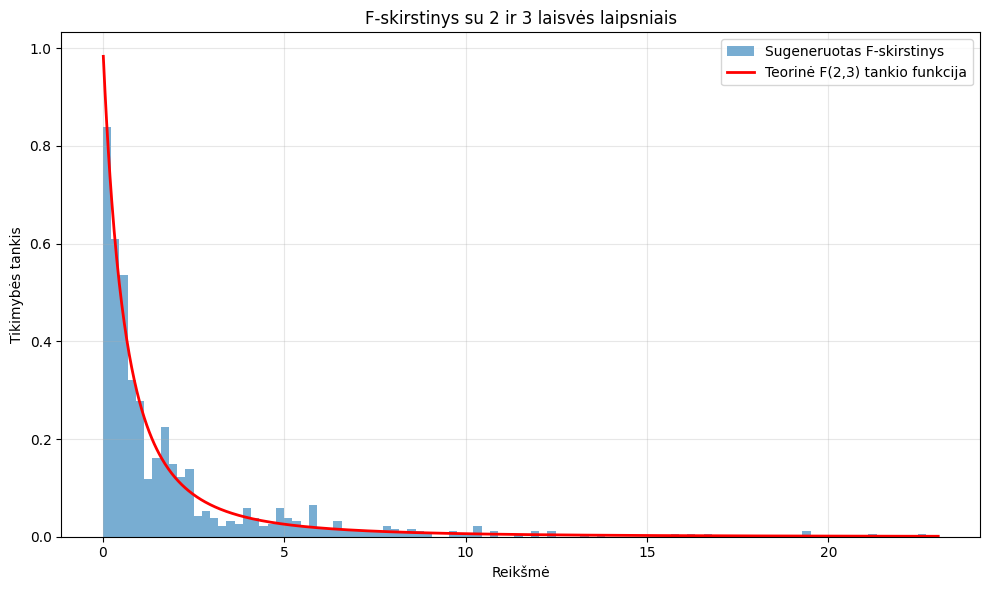

In [18]:
a = 124
c = 874
m = 1107
seed = 1

v1 = 2  # Skaitiklio laisvės laipsniai
v2 = 3  # Vardiklio laisvės laipsniai

# Imties dydžio skaičiavimas
# Kiekvienai F-pasiskirsčiusiai reikšmei reikia:
# - v1 standartinių normaliųjų chi-kvadratui su v1 laisvės laipsniais
# - v2 standartinių normaliųjų chi-kvadratui su v2 laisvės laipsniais
# Kiekviena Box-Muller transformacija reikalauja 2 tolygiai pasiskirsčiusių atsitiktinių skaičių 2 standartiniams normaliesiems sugeneruoti

target_sample_size = 1000
needed_uniforms = math.ceil(target_sample_size * (v1 + v2) / 2)

# Generuoti tolygiai pasiskirsčiusius atsitiktinius skaičius naudojant LCG
print(f"Generuojami {needed_uniforms} tolygiai pasiskirstyti atsitiktiniai skaičiai naudojant LCG...")
uniform_random_numbers = generate_uniform_random_numbers(a, c, m, seed, needed_uniforms)

# Transformuoti į standartinį normalųjį skirstinį naudojant Box-Muller
print("Transformuojama į standartinį normalųjį skirstinį naudojant Box-Muller transformaciją...")
standard_normals = box_muller_transform(uniform_random_numbers)

# Generuoti chi-kvadrato kintamuosius
print(f"Generuojami chi-kvadrato kintamieji su {v1} ir {v2} laisvės laipsniais...")
chi_squared_v1 = generate_chi_squared(standard_normals, v1)
chi_squared_v2 = generate_chi_squared(standard_normals, v2)

# Generuoti F-pasiskirsčiusius kintamuosius naudojant formulę X = (v2*Y1)/(v1*Y2)
print("Skaičiuojami F-pasiskirsčiusių atsitiktiniai kintamieji...")
f_values = generate_f_distribution(chi_squared_v1, chi_squared_v2, v1, v2)

analyze_f_distribution(f_values, v1, v2)

plot_f_distribution(f_values, v1, v2)

Chi kvadrato skirstinys su df laisvės laipsniais apibrėžiamas kaip: $$\chi^2 = Z_1^2 + Z_2^2 + ... + Z_{df}^2$$

Kur kiekvienas Z_i ~ N(0,1) (standartinis normalusis skirstinys).

In [19]:
def analyze_chi_squared_distribution(chi_squared_values, df):
    print(f"\nChi-kvadrato skirstinio analizė (df={df}):")
    print(f"Imties dydis: {len(chi_squared_values)}")
    
    # Pagrindinė statistika
    mean = sum(chi_squared_values) / len(chi_squared_values)
    variance = sum((x - mean) ** 2 for x in chi_squared_values) / len(chi_squared_values)
    
    # Teorinės vertės
    theoretical_mean = df
    theoretical_var = 2 * df
    
    print(f"Vidurkis: {mean:.4f} (Teorinis: {theoretical_mean:.4f})")
    print(f"Dispersija: {variance:.4f} (Teorinė: {theoretical_var:.4f})")
    
    # Kvantilių palyginimas
    chi_squared_values_sorted = sorted(chi_squared_values)
    quantiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
    
    print("\nKvantilių palyginimas:")
    print(f"{'Kvantilis':<10}{'Sugeneruota':<15}{'Teorinis':<15}{'Skirtumas':<15}")
    
    for q in quantiles:
        idx = int(q * len(chi_squared_values))
        sample_quantile = chi_squared_values_sorted[idx]
        theoretical_quantile = stats.chi2.ppf(q, df)
        diff = abs(sample_quantile - theoretical_quantile)
        
        print(f"{q:<10}{sample_quantile:<15.4f}{theoretical_quantile:<15.4f}{diff:<15.4f}")

def plot_chi_squared_distribution(chi_squared_values, df):
    plt.figure(figsize=(10, 6))
    
    # Filtruoti ekstremalias reikšmes geresnei vizualizacijai
    max_display = np.percentile(chi_squared_values, 99)
    plot_values = [x for x in chi_squared_values if x <= max_display]
    
    # Vaizduoti histogramą
    hist, bins, _ = plt.hist(plot_values, bins=50, density=True, alpha=0.6, 
                             label='Sugeneruotas Chi-kvadrato skirstinys')
    
    # Vaizduoti teorinę chi-kvadrato tankio funkciją
    x = np.linspace(0.01, max_display, 1000)
    y = stats.chi2.pdf(x, df)
    plt.plot(x, y, 'r-', lw=2, label=f'Teorinė χ²({df}) tankio funkcija')
    
    # Diagramos nustatymai
    plt.title(f'Chi-kvadrato skirstinys su {df} laisvės laipsniais')
    plt.xlabel('Reikšmė')
    plt.ylabel('Tikimybės tankis')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Generuojami 2500 tolygiai pasiskirstyti atsitiktiniai skaičiai naudojant LCG...
Transformuojama į standartinį normalųjį skirstinį naudojant Box-Muller transformaciją...
Generuojami chi-kvadrato kintamieji su 5 laisvės laipsniais...

Chi-kvadrato skirstinio analizė (df=5):
Imties dydis: 500
Vidurkis: 5.1354 (Teorinis: 5.0000)
Dispersija: 14.1392 (Teorinė: 10.0000)

Kvantilių palyginimas:
Kvantilis Sugeneruota    Teorinis       Skirtumas      
0.01      0.5287         0.5543         0.0256         
0.05      1.1045         1.1455         0.0410         
0.1       1.5290         1.6103         0.0813         
0.25      2.7605         2.6746         0.0859         
0.5       4.4383         4.3515         0.0869         
0.75      6.6450         6.6257         0.0193         
0.9       9.4370         9.2364         0.2007         
0.95      11.5193        11.0705        0.4488         
0.99      15.1945        15.0863        0.1082         


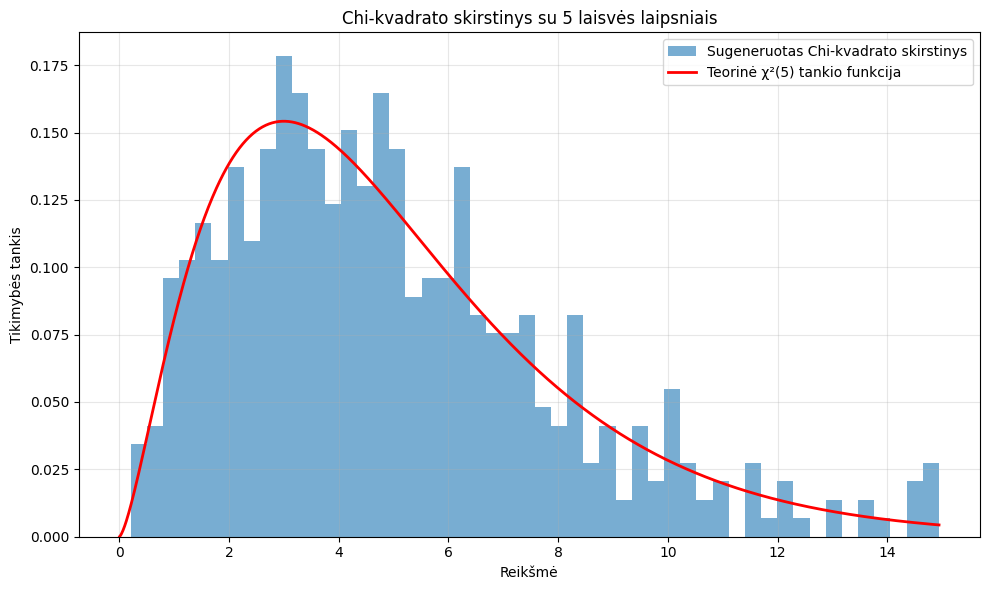

In [20]:
# Chi-kvadrato skirstinio parametras
df = 5  # Laisvės laipsniai

# Imties dydžio skaičiavimas
# Kiekvienai chi-kvadrato reikšmei reikia df standartinių normaliųjų
# Kiekviena Box-Muller transformacija reikalauja 2 tolygiai pasiskirsčiusių atsitiktinių skaičių 2 standartiniams normaliesiems sugeneruoti
target_sample_size = 1000  # Chi-kvadrato reikšmių, kurias norime sugeneruoti, skaičius
needed_uniforms = math.ceil(target_sample_size * (df/2))

# Generuoti tolygiai pasiskirsčiusius atsitiktinius skaičius naudojant LCG
print(f"Generuojami {needed_uniforms} tolygiai pasiskirstyti atsitiktiniai skaičiai naudojant LCG...")
uniform_random_numbers = generate_uniform_random_numbers(a, c, m, seed, needed_uniforms)

# Transformuoti į standartinį normalųjį skirstinį naudojant Box-Muller
print("Transformuojama į standartinį normalųjį skirstinį naudojant Box-Muller transformaciją...")
standard_normals = box_muller_transform(uniform_random_numbers)

# Generuoti chi-kvadrato kintamuosius
print(f"Generuojami chi-kvadrato kintamieji su {df} laisvės laipsniais...")
chi_squared_values = generate_chi_squared(standard_normals, df)

analyze_chi_squared_distribution(chi_squared_values, df)
plot_chi_squared_distribution(chi_squared_values, df)


Ši funkcija apskaičiuoja apibrėžtąjį integralą naudojant Monte Carlo metodą su sugeneruotais pseudoatsitiktiniais skaičiais.

In [ ]:
def monte_carlo_integration(func, a, b, num_samples=1000):

    # Sugeneruojame tolygiai pasiskirsčiusius atsitiktinius skaičius
    # Parametrai iš lcg_parameters_calculator išvesties
    lcg_a = 124
    lcg_c = 874
    lcg_m = 1107
    seed = 1
    
    # Sugeneruojame tiksliai reikiamą imčių skaičių
    lcg_values = generate_lcg_sequence(lcg_a, lcg_c, lcg_m, seed, num_samples)
    
    # Konvertuojame į reikšmes intervale [a, b]
    uniform_samples = []
    for val in lcg_values:
        # Normalizuojame į [0, 1], tada keičiame mastelį į [a, b]
        x = a + (b - a) * (val / lcg_m)
        uniform_samples.append(x)
    
    # Įvertiname funkciją kiekviename imties taške
    function_values = [func(x) for x in uniform_samples]
    
    # Apskaičiuojame vidutinę funkcijos reikšmę ir padauginame iš intervalo pločio
    average_value = sum(function_values) / num_samples
    integral_estimate = (b - a) * average_value
    
    return integral_estimate, uniform_samples, function_values


In [231]:
# Apibrėžiame integruojamą funkciją: f(x) = x(ln(x) + e^x)
def f(x):
    return x * (math.log(x) + math.exp(x))

# Integravimo ribos
a = 1
b = math.pi

# Integralo ∫[1 iki π] (x(ln(x)+e^x))dx apskaičiavimas
exact_value = 52.989551800
print(f"Tiksli reikškmė: {exact_value:.10f}")
print("\nMonte Karlo integravimas su tolygiuoju pasiskirstymu:")
print(f"{'Imties dydis':<15}{'Metodas':<20}{'Įvertis':<20}{'Absoliutinė paklaida':<20}{'Santykinė paklaida (%)':<20}")

# Atliekame Monte Karlo integravimą su 1000 imčių
estimate, samples, function_values = monte_carlo_integration(f, a, b)
abs_error = abs(estimate - exact_value)
rel_error = abs_error / exact_value * 100
print(f"{1000:<15}{'Tolygusis':<20}{estimate:<20.10f}{abs_error:<20.10f}{rel_error:<20.6f}")

print("\nIšvada:")
print(f"Integralas ∫[1 iki π] (x(ln(x)+e^x))dx ≈ {estimate:.10f}")

Tiksli reikškmė: 52.9895518000

Monte Karlo integravimas su tolygiuoju pasiskirstymu:
Imties dydis   Metodas             Įvertis             Absoliutinė paklaidaSantykinė paklaida (%)
1000           Tolygusis           52.7255815406       0.2639702594        0.498155            

Išvada:
Integralas ∫[1 iki π] (x(ln(x)+e^x))dx ≈ 52.7255815406


In [232]:
# Integravimo ribos
a = math.e
b = math.pi

# Integralo ∫[e iki π] (x(ln(x)+e^x))dx apskaičiavimas
exact_value = 24.8529943
print(f"Tiksli reikškmė: {exact_value:.10f}")
print("\nMonte Karlo integravimas su tolygiuoju pasiskirstymu:")
print(f"{'Imties dydis':<15}{'Metodas':<20}{'Įvertis':<20}{'Absoliutinė paklaida':<20}{'Santykinė paklaida (%)':<20}")

# Atliekame Monte Karlo integravimą su 1000 imčių
estimate, samples, function_values = monte_carlo_integration(f, a, b)
abs_error = abs(estimate - exact_value)
rel_error = abs_error / exact_value * 100
print(f"{1000:<15}{'Tolygusis':<20}{estimate:<20.10f}{abs_error:<20.10f}{rel_error:<20.6f}")

print("\nIšvada:")
print(f"Integralas ∫[e iki π] (x(ln(x)+e^x))dx ≈ {estimate:.10f}")


Tiksli reikškmė: 24.8529943000

Monte Karlo integravimas su tolygiuoju pasiskirstymu:
Imties dydis   Metodas             Įvertis             Absoliutinė paklaidaSantykinė paklaida (%)
1000           Tolygusis           24.8233331791       0.0296611209        0.119346            

Išvada:
Integralas ∫[e iki π] (x(ln(x)+e^x))dx ≈ 24.8233331791


Sugeneruokite Markovo grandinę, kurią pavaizdavus grafiku gautume tokias viršūnių ir briaunų aibes:
 - S={v_1, v_2, v_3, v_4, v_5}
 - E={<v_1, v_2>, <v_1, v_3>, <v_1, v_4>, <v_1, v_5>, <v_2, v_3>, <v_4, v_5>} 

Iš vienos viršūnės į kitą kaimyninę viršunę pereinama su lygiomis tikimybėmis, priklausomai nuo kaimyninių viršūnių skaičiaus.

-------------------------------------------------
Perėjimo tikimybių matrica:
     | v1   | v2   | v3   | v4   | v5   |
-----|------|------|------|------|------|
  v1 | 0.00 | 0.25 | 0.25 | 0.25 | 0.25 |
  v2 | 0.00 | 0.00 | 1.00 | 0.00 | 0.00 |
  v3 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
  v4 | 0.00 | 0.00 | 0.00 | 0.00 | 1.00 |
  v5 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |


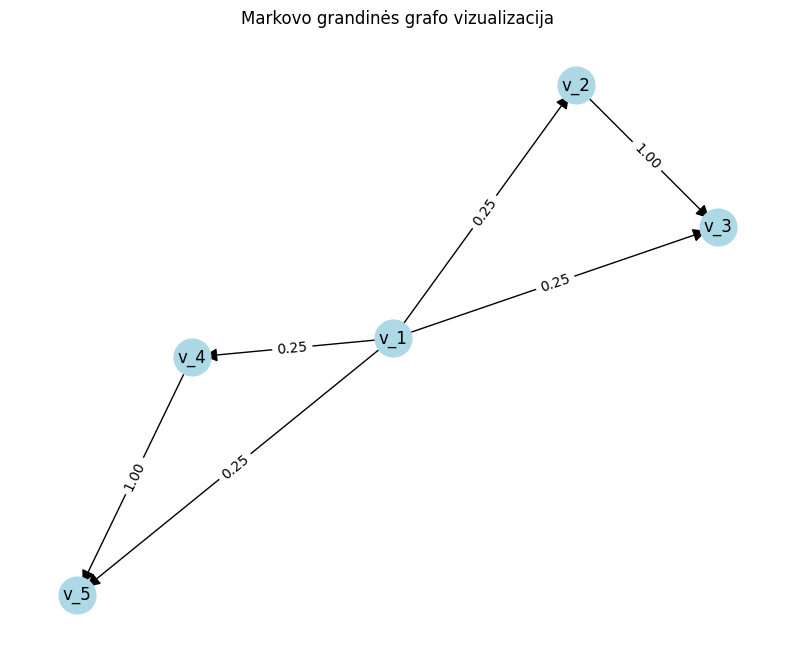

In [ ]:
def create_transition_matrix(edges, num_vertices):
    # Pradinė matrica su nuliais
    transition_matrix = np.zeros((num_vertices, num_vertices))
    
    # Suskaičiuokite kiekvienos viršūnės išeinančias briaunas
    outgoing_counts = [0] * num_vertices
    for from_vertex, _ in edges:
        outgoing_counts[from_vertex - 1] += 1

    # Užpildykite perėjimo tikimybių matricą
    for from_vertex, to_vertex in edges:
        from_idx = from_vertex - 1
        to_idx = to_vertex - 1
        
        # Tikimybė yra 1 / (išeinančių briaunų skaičius)
        if outgoing_counts[from_idx] > 0:
            transition_matrix[from_idx, to_idx] = 1 / outgoing_counts[from_idx]
    
    return transition_matrix

def generate_markov_chain(transition_matrix, starting_state, num_steps):
    num_states = transition_matrix.shape[0]
    chain = [starting_state]
    
    current_state = starting_state
    for _ in range(num_steps):
        # Gauti tikimybių pasiskirstymą dabartinei būsenai
        probabilities = transition_matrix[current_state]
        
        # Jei nėra išeinančiųjų perėjimų (absorbuojanti būsena), liekame dabartinėje būsenoje
        if np.sum(probabilities) < 1e-10:  # Patikrinti, ar tikimybių suma apytiksliai lygi nuliui
            next_state = current_state
        else:
            # Pasirinkti kitą būseną pagal tikimybes
            # Užtikrinti, kad tikimybių suma būtų 1
            probabilities = probabilities / np.sum(probabilities)
            next_state = np.random.choice(num_states, p=probabilities)
        
        chain.append(next_state)
        current_state = next_state
    
    # Konvertuoti į 1-indeksuotą išvedimą
    return [state + 1 for state in chain]

def visualize_graph(edges, num_vertices, transition_matrix):
    G = nx.DiGraph()
    
    for i in range(1, num_vertices + 1):
        G.add_node(i, label=f"v_{i}")
    
    G.add_edges_from(edges)
    
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=123)
    
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
    
    nx.draw_networkx_labels(G, pos, labels={i: f"v_{i}" for i in range(1, num_vertices+1)}, font_size=12)
    
    nx.draw_networkx_edges(G, pos, arrowsize=20)
    
    edge_labels = {}
    for from_vertex, to_vertex in edges:
        prob = transition_matrix[from_vertex-1, to_vertex-1]
        edge_labels[(from_vertex, to_vertex)] = f"{prob:.2f}"

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title("Markovo grandinės grafo vizualizacija")
    plt.axis('off')
    plt.show()


# Apibrėžti grafą pagal uždavinio sąlygą
vertices = [1, 2, 3, 4, 5]
edges = [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (4, 5)]

# Sukurti perėjimo matricą
transition_matrix = create_transition_matrix(edges, len(vertices))

print("Perėjimo tikimybių matrica:")
print("     | v1   | v2   | v3   | v4   | v5   |")
print("-----|------|------|------|------|------|")
for i, row in enumerate(transition_matrix):
    row_str = f"  v{i+1} |"
    for prob in row:
        row_str += f" {prob:.2f} |"
    print(row_str)

visualize_graph(edges, len(vertices), transition_matrix)